#Tesla (TSLA) Stock Price prediction using Facebook Prophet

##Importing all the necessary libraries

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import plotly.io as pio
import plotly.express as px

from prophet import Prophet

In [ ]:
pio.renderers.default = 'colab'

##Importing the dataset

In [ ]:
df = pd.read_csv('/content/TSLA.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500
...,...,...,...,...,...,...,...
975,2024-01-30,195.330002,196.360001,190.610001,191.589996,191.589996,109982300
976,2024-01-31,187.000000,193.970001,185.850006,187.289993,187.289993,103221400
977,2024-02-01,188.500000,189.880005,184.279999,188.860001,188.860001,91843300
978,2024-02-02,185.039993,188.690002,182.000000,187.910004,187.910004,110505100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       980 non-null    object 
 1   Open       980 non-null    float64
 2   High       980 non-null    float64
 3   Low        980 non-null    float64
 4   Close      980 non-null    float64
 5   Adj Close  980 non-null    float64
 6   Volume     980 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 53.7+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,980.000000,980.000000,980.000000,980.000000,980.000000,9.800000e+02
mean,217.743335,222.610911,212.441471,217.636107,217.636107,1.233882e+08
std,78.278656,79.825965,76.444992,78.081802,78.081802,7.130596e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,179.730003,183.807499,175.872498,180.384998,180.384998,7.618770e+07
50%,226.458328,231.596665,222.196663,226.433335,226.433335,1.040156e+08
75%,265.233330,269.310005,260.087494,264.555008,264.555008,1.460663e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,6.663786e+08


In [ ]:
df.shape

(980, 7)

##Data Visualization

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, y='Volume')

In [ ]:
px.box(df, y='Close')

##Data Preparation & Modelling

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500
...,...,...,...,...,...,...,...
975,2024-01-30,195.330002,196.360001,190.610001,191.589996,191.589996,109982300
976,2024-01-31,187.000000,193.970001,185.850006,187.289993,187.289993,103221400
977,2024-02-01,188.500000,189.880005,184.279999,188.860001,188.860001,91843300
978,2024-02-02,185.039993,188.690002,182.000000,187.910004,187.910004,110505100


In [ ]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)

ndf

,Date,Close
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001
...,...,...
975,2024-01-30,191.589996
976,2024-01-31,187.289993
977,2024-02-01,188.860001
978,2024-02-02,187.910004


In [ ]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001
...,...,...
975,2024-01-30,191.589996
976,2024-01-31,187.289993
977,2024-02-01,188.860001
978,2024-02-02,187.910004


##Creating Facebbook Prophet Model

In [ ]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9o744jv/dtqf9z0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9o744jv/03f2lzlr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99702', 'data', 'file=/tmp/tmpf9o744jv/dtqf9z0d.json', 'init=/tmp/tmpf9o744jv/03f2lzlr.json', 'output', 'file=/tmp/tmpf9o744jv/prophet_modelzbxgn7sa/prophet_model-20240212172832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


###Forecasting

In [ ]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,30.724956,-18.247514,62.756164,30.724956,30.724956,-10.113972,-10.113972,-10.113972,1.344947,1.344947,1.344947,-11.458918,-11.458918,-11.458918,0.0,0.0,0.0,20.610984
1,2020-03-17,31.298712,-20.355512,65.499898,31.298712,31.298712,-9.122920,-9.122920,-9.122920,0.436256,0.436256,0.436256,-9.559175,-9.559175,-9.559175,0.0,0.0,0.0,22.175792
2,2020-03-18,31.872468,-14.035513,64.522574,31.872468,31.872468,-6.841985,-6.841985,-6.841985,0.741535,0.741535,0.741535,-7.583520,-7.583520,-7.583520,0.0,0.0,0.0,25.030482
3,2020-03-19,32.446224,-14.810831,67.534463,32.446224,32.446224,-5.897419,-5.897419,-5.897419,-0.326092,-0.326092,-0.326092,-5.571327,-5.571327,-5.571327,0.0,0.0,0.0,26.548805
4,2020-03-20,33.019980,-13.911932,68.538495,33.019980,33.019980,-4.573831,-4.573831,-4.573831,-1.012744,-1.012744,-1.012744,-3.561087,-3.561087,-3.561087,0.0,0.0,0.0,28.446149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2024-03-02,251.999505,194.056496,276.785176,251.590142,252.347674,-14.117953,-14.117953,-14.117953,-0.591950,-0.591950,-0.591950,-13.526003,-13.526003,-13.526003,0.0,0.0,0.0,237.881552
1006,2024-03-03,252.156440,194.278085,277.291713,251.689821,252.553098,-15.855487,-15.855487,-15.855487,-0.591951,-0.591951,-0.591951,-15.263536,-15.263536,-15.263536,0.0,0.0,0.0,236.300953
1007,2024-03-04,252.313374,194.248473,278.853436,251.799405,252.763097,-15.395902,-15.395902,-15.395902,1.344947,1.344947,1.344947,-16.740849,-16.740849,-16.740849,0.0,0.0,0.0,236.917472
1008,2024-03-05,252.470309,195.145629,275.870622,251.915118,252.971142,-17.496439,-17.496439,-17.496439,0.436256,0.436256,0.436256,-17.932694,-17.932694,-17.932694,0.0,0.0,0.0,234.973871


In [ ]:
px.line(forecast, x='ds', y='yhat')

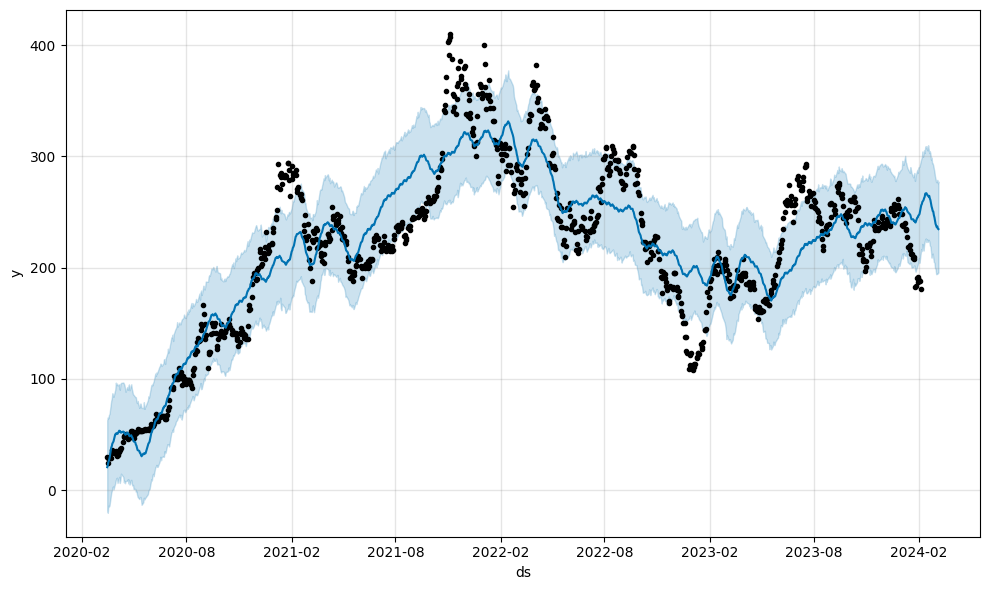

In [ ]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

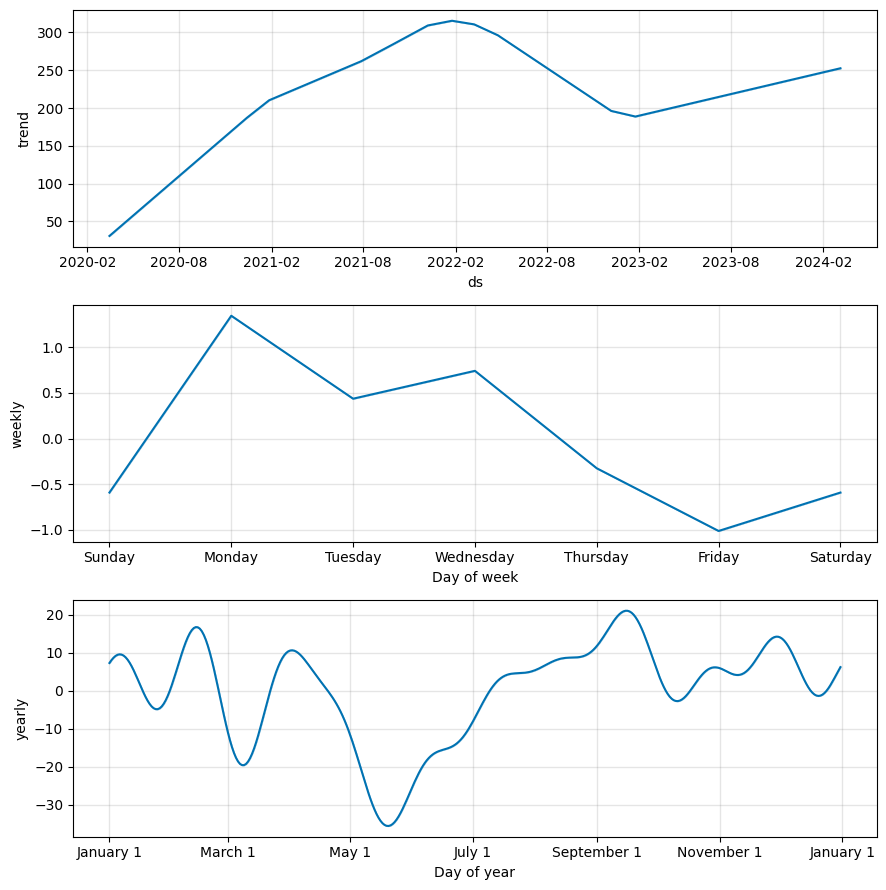

In [ ]:
figure2 = model.plot_components(forecast)

##Download the forecast data

In [ ]:
from google.colab import files

In [ ]:
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>